# Pymaceuticals Inc.
---

### Analysis

Over the course of 45 days, this study analyzed the effects of a placebo and a range of nine drug treatment regimens on the tumor development of 248 mice suffering from a commonly occurring form of skin cancer, squamous cell carcinoma (SCC).  The most promising treatments in this range included Ceftamin, Infubinol, Ramicane, and this company’s drug of interest, Capomulin.  The ultimate purpose of this study was to compare the performance of Capomulin against the other drug candidates.

A superficial analysis of this study yields some interesting observations concerning the efficacy of the top four drugs.  Except for Ramicane with its symmetrical tumor volume distribution, all the treatment regimens have skewed distributions towards the low end indicated by a margin between the median and mean below.  Moreover, Ramicane and Capomulin have the narrowest distributions while Ceftamin’s is the widest, about as wide as the placebo’s, followed by Infubinol.  Generally, the narrower distributions with their lower variances infer a consistency in outcomes.  On top of that, Ramicane and Capomulin have the lowest median tumor volumes; Ceftamin and Infubinol have the same median, which is noticeably higher and comparable to the placebo’s value.  What’s more, Capomulin’s mouse weight and tumor volume metrics have a very strong relationship evidenced by a 0.842 linear correlation.

Unfortunately, upon closer examination, there are serious anomalies in this study’s data collection and quality control.  For instance, Infubinol’s distribution has a single statistically insignificant low outlier: inexplicably, one of only two data points from a single mouse in a study where each mouse should have ten data points.  Further investigation reveals that Ramicane and Capomulin have 22-29% more data points than the other treatment regimens except for Propriva where the difference grows to 55%.  This discrepancy comes from the number of data points per mouse: each candidate has about 25 mice for its trial, however, unlike the others who have fewer, Ramicane’s and Capomulin’s mice overwhelmingly have ten data points.  This situation begs the question: would comparable numbers of data points per mouse change the outcomes?  Would more data points for all the candidates?  Furthermore, the original number of mice was 249, but one mouse had duplicate timepoints with suspiciously different tumor volumes.  

Ostensibly, Ramicane is the most promising drug with Capomulin a close second, and neither Ceftamin nor Infubinol have any discernable effect on decreasing tumor volume.  In truth, this study should be invalidated due to asymmetrical data collection, inconsistencies, and insufficient sample spaces.  Therefore, I recommend another study of these treatments where each mouse provides ten data points for analysis, the number of mice per trial increases from 25 to 100, the weight of each mouse in the study is approximately the same, and clinical trial managers review data for inconsistencies immediately after collection.   Once a decision based on a valid and accurate study is forthcoming, the company can begin investigating the best possible dosage of Capomulin, or any other treatment for SCC, based on a subject’s weight.

In [1]:
#*******************************************************************************************
 #
 #  File Name:  Pymaceuticals.ipynb
 #
 #  File Description:
 #      This interactive Python notebook, Pymaceuticals.ipynb, reads two csv files,
 #      Mouse_metadata.csv and Study_results.csv, in the Resources folder, which 
 #      contain data about a pharmaceutical company's most recent animal study. 
 #      In this study, two hundred forty-nine mice, who were identified with SCC 
 #      tumors, received treatment with a range of drug regimens. Over the course 
 #      of 45 days, tumor development was observed and measured. The purpose of 
 #      this study was to compare the performance of Pymaceuticals’ drug of interest, 
 #      Capomulin, against the other treatment regimens.  This Python script generates 
 #      all of the tables and figures needed for a technical report of this clinical 
 #      study.
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  08/18/2023      Initial Development                     N. James George
 #
 #******************************************************************************************/

import PymaceuticalsFunctions as local_function
import PymaceuticalsSubRoutines as local_subroutine

import PyConstants as constant
import PyFunctions as function
import PyLogConstants as log_constant
import PyLogFunctions as log_function
import PyLogSubRoutines as log_subroutine
import PySubroutines as subroutine

import numpy as np
import pandas as pd

In [2]:
CONSTANT_LOCAL_FILE_NAME \
    = 'Pymaceuticals.ipynb'

CONSTANT_MOUSE_INFO_CSV_FILE_PATH \
    = './Resources/MouseMetaData.csv'

CONSTANT_MEDICAL_STUDY_CSV_FILE_PATH \
    = './Resources/StudyResults.csv'


log_subroutine \
    .SetLogMode \
        (False)

log_subroutine \
    .SetDebugMode \
        (False)

log_subroutine \
    .SetImageMode \
        (False)


log_subroutine \
    .BeginProgramExecution \
        ('Pymaceuticals')

Program execution begins...



# <br> **Section 1: Data Preparation**

### **Read CSV Files into DataFrames**

In [3]:
mouseInfoDataFrame \
    = function. \
        ReturnCSVFileAsDataFrame \
            (CONSTANT_MOUSE_INFO_CSV_FILE_PATH)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseInfoDataFrame)

In [4]:
medicalStudyDataFrame \
    = function. \
        ReturnCSVFileAsDataFrame \
            (CONSTANT_MEDICAL_STUDY_CSV_FILE_PATH)


log_function \
    .DebugReturnObjectWriteObject \
        (medicalStudyDataFrame)

###  **<span style='color: red;'>Merge DataFrames</span>**

In [5]:
completeMedicalStudyDataFrame \
    = function \
        .ReturnMergedDataFrame \
            (mouseInfoDataFrame,
             medicalStudyDataFrame,
             'left',
             'Mouse ID')


log_function \
    .DebugReturnObjectWriteObject \
        (completeMedicalStudyDataFrame)

### **Display Merged DataFrame Subset**

In [6]:
local_function \
    .ReturnFormattedCompleteMedicalStudyStylerObject \
        (function \
             .ReturnStylerObjectStandardFormat \
                (completeMedicalStudyDataFrame.head(12), ''),
         'Table 1.1: Complete Medical Study Data')

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
k403,Ramicane,Male,21,16.00,0,45.00,0
k403,Ramicane,Male,21,16.00,5,38.83,0
k403,Ramicane,Male,21,16.00,10,35.01,1
k403,Ramicane,Male,21,16.00,15,34.22,1
k403,Ramicane,Male,21,16.00,20,33.00,1
k403,Ramicane,Male,21,16.00,25,33.46,1
k403,Ramicane,Male,21,16.00,30,31.10,1
k403,Ramicane,Male,21,16.00,35,26.55,1
k403,Ramicane,Male,21,16.00,40,24.37,1
k403,Ramicane,Male,21,16.00,45,22.05,1


### **<span style='color: red;'>Display the Number of Unique Mouse IDs in the Data</span>**

In [7]:
numberOfUniqueMouseIDsIntegerVariable \
    = function \
        .ReturnNumberOfUniqueElementsInColumn \
            (completeMedicalStudyDataFrame, 
             'Mouse ID')

log_subroutine \
    .PrintAndLogWriteText \
        (f'The number of unique mouse IDs in the complete medical study DataFrame is ' \
         + f"{numberOfUniqueMouseIDsIntegerVariable}.")

The number of unique mouse IDs in the complete medical study DataFrame is 249.


### **<span style='color: red;'>Check for Any Mouse ID with Duplicate Time Points</span>**

In [8]:
duplicateMouseIDDataFrame \
    = function \
        .ReturnDuplicateRowsAsDataFrame \
            (completeMedicalStudyDataFrame,
             ['Mouse ID', 
              'Timepoint'])


log_function \
    .DebugReturnObjectWriteObject \
        (duplicateMouseIDDataFrame)

### **Display the Data Associated With Duplicate Mouse IDs**

In [9]:
local_function \
    .ReturnFormattedCompleteMedicalStudyStylerObject \
        (function \
             .ReturnStylerObjectStandardFormat \
                (duplicateMouseIDDataFrame, ''),
         'Table 1.2: Duplicate Mouse IDs and Timepoints in Complete Medical Study')

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
g989,Propriva,Female,21,26.00,0,45.00,0
g989,Propriva,Female,21,26.00,5,47.57,0
g989,Propriva,Female,21,26.00,10,49.88,0
g989,Propriva,Female,21,26.00,15,53.44,0
g989,Propriva,Female,21,26.00,20,54.66,1


In [10]:
duplicateMouseIDsList \
    = duplicateMouseIDDataFrame \
        ['Mouse ID'] \
            .unique() \
                .tolist()


log_function \
    .DebugReturnObjectWriteObject \
        (duplicateMouseIDsList)

In [11]:
local_function \
    .ReturnFormattedCompleteMedicalStudyStylerObject \
        (function \
             .ReturnStylerObjectStandardFormat \
                (function \
                     .ReturnDataFrameRowsWithValue \
                         (completeMedicalStudyDataFrame, 
                          'Mouse ID', 
                          duplicateMouseIDsList), ''),
                 'Table 1.3: Rows with Duplicate Mouse IDs in Complete Medical Study')

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
g989,Propriva,Female,21,26.00,0,45.00,0
g989,Propriva,Female,21,26.00,0,45.00,0
g989,Propriva,Female,21,26.00,5,48.79,0
g989,Propriva,Female,21,26.00,5,47.57,0
g989,Propriva,Female,21,26.00,10,51.75,0
g989,Propriva,Female,21,26.00,10,49.88,0
g989,Propriva,Female,21,26.00,15,51.33,1
g989,Propriva,Female,21,26.00,15,53.44,0
g989,Propriva,Female,21,26.00,20,55.33,1
g989,Propriva,Female,21,26.00,20,54.66,1


### **<span style='color: red;'>Create New Complete Medical Study DataFrame Without Duplicate Mouse IDs</span>**

In [12]:
cleanCompleteMedicalStudyDataFrame \
    = function \
        .ReturnDataFrameRowsWithoutValue \
            (completeMedicalStudyDataFrame, 
                'Mouse ID', 
                duplicateMouseIDsList)


log_function \
    .DebugReturnObjectWriteObject \
        (cleanCompleteMedicalStudyDataFrame)

### **<span style='color: red;'>Display the Updated Number of Unique Mouse IDs</span>**

In [13]:
updatedNumberOfUniqueMouseIDsIntegerVariable \
    = function \
        .ReturnNumberOfUniqueElementsInColumn \
            (cleanCompleteMedicalStudyDataFrame, 
             'Mouse ID')

log_subroutine \
    .PrintAndLogWriteText \
        (f'The updated number of unique mouse IDs in the complete medical study DataFrame is ' \
         + f"{updatedNumberOfUniqueMouseIDsIntegerVariable}.")

The updated number of unique mouse IDs in the complete medical study DataFrame is 248.


# <br> **Section 2: Summary Statistics**

### **New Medical Study DataFrame Grouped by Drug Regimen**

In [14]:
completeMedicalStudyGroupedByRegimenDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .groupby \
            ('Drug Regimen')

### **<span style='color: red;'>Tumor Volume (Mean)</span>**

In [15]:
meanTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
            ['Tumor Volume (mm3)'] \
            .mean()


log_function \
    .DebugReturnObjectWriteObject \
        (meanTumorVolumeSeries)

### **<span style='color: red;'>Tumor Volume (Median)</span>**

In [16]:
medianTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
            ['Tumor Volume (mm3)'] \
            .median()


log_function \
    .DebugReturnObjectWriteObject \
        (medianTumorVolumeSeries)

### **<span style='color: red;'>Tumor Volume (Variance)</span>**

In [17]:
varianceTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
            ['Tumor Volume (mm3)'] \
            .var()


log_function \
    .DebugReturnObjectWriteObject \
        (varianceTumorVolumeSeries)

### **<span style='color: red;'>Tumor Volume (Standard Deviation)</span>**

In [18]:
standardTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
            ['Tumor Volume (mm3)'] \
            .std()


log_function \
    .DebugReturnObjectWriteObject \
        (standardTumorVolumeSeries)

### **<span style='color: red;'>Tumor Volume (Standard Errror of the Mean)</span>**

In [19]:
standardErrorOfTheMeanTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
            ['Tumor Volume (mm3)'] \
            .sem()


log_function \
    .DebugReturnObjectWriteObject \
        (standardErrorOfTheMeanTumorVolumeSeries)

### **<span style='color: red;'>Summary Statistics DataFrame</span>**

In [20]:
summaryStatisticsDataFrame \
    = pd \
        .DataFrame({
            'Mean':
                meanTumorVolumeSeries,
            'Median':
                medianTumorVolumeSeries,
            'Variance':
                varianceTumorVolumeSeries,
            'Standard Deviation':
                standardTumorVolumeSeries,
            'Standard Error of the Mean':
                standardErrorOfTheMeanTumorVolumeSeries})


log_function \
    .DebugReturnObjectWriteObject \
        (summaryStatisticsDataFrame)

### **Display Summary Statistics**

In [21]:
function \
    .ReturnStylerObjectBackgroundGradientFormat \
        (summaryStatisticsDataFrame, 
         'Table 2.0: Summary Statistics (Tumor Volume)')

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# <br> **Section 3: Bar Charts and Pie Charts**

### **Prepare Series and Format for Bar Charts**

In [22]:
countByDrugRegimenSeries \
    = cleanCompleteMedicalStudyDataFrame \
            ['Drug Regimen'] \
      .value_counts()


log_function \
    .DebugReturnObjectWriteObject \
        (countByDrugRegimenSeries)

In [23]:
barColorsList \
    = ['red',
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue']

### **<span style='color: red;'>Bar Chart With the Pandas Method</span>**

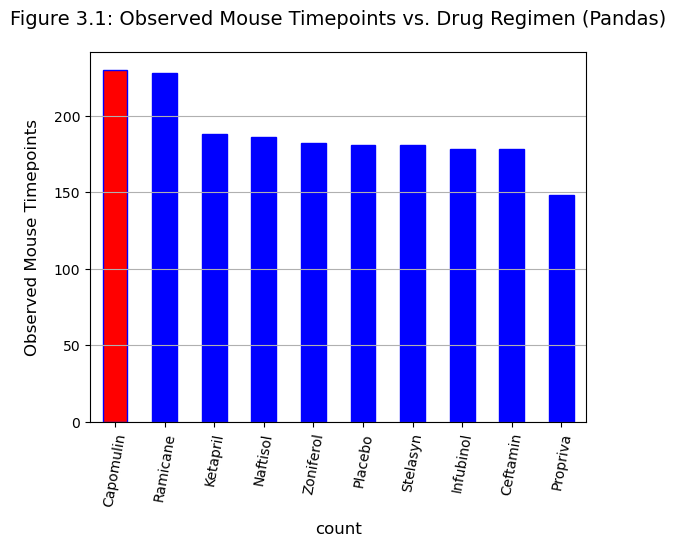

In [24]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (countByDrugRegimenSeries, 
         barColorsList,
         'Figure 3.1: Observed Mouse Timepoints vs. Drug Regimen (Pandas)',
         'Observed Mouse Timepoints')

### **<span style='color: red;'>Bar Chart With the Matplotlib Method</span>**

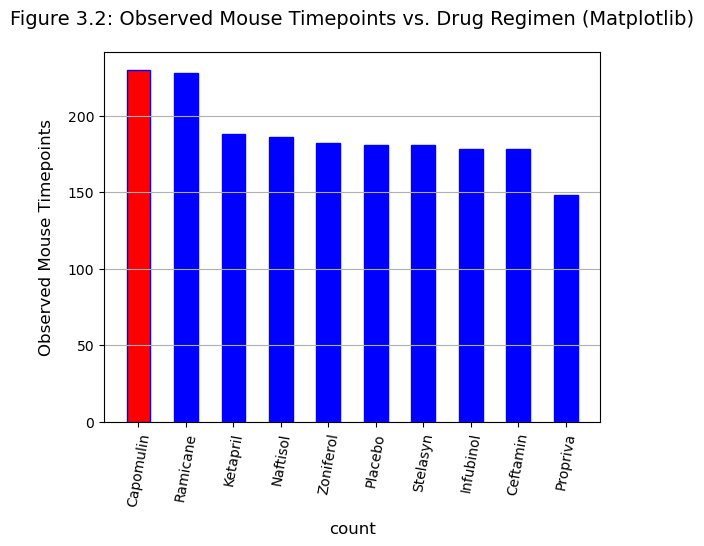

In [25]:
subroutine \
    .DisplayMatplotlibBarChartFromSeries \
        (countByDrugRegimenSeries, 
         barColorsList,
         'Figure 3.2: Observed Mouse Timepoints vs. Drug Regimen (Matplotlib)',
         'Observed Mouse Timepoints')

### **Prepare Series and Format for Pie Charts**

In [26]:
mouseCountByGenderSeries \
    = cleanCompleteMedicalStudyDataFrame \
            ['Sex'] \
            .value_counts()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseCountByGenderSeries)

In [27]:
pieColorsList \
    = ['deepskyblue',
       'pink']

explodeTuple \
    = (0.02,
       0.02)

### **<span style='color: red;'>Pie Chart With the Pandas Method</span>**

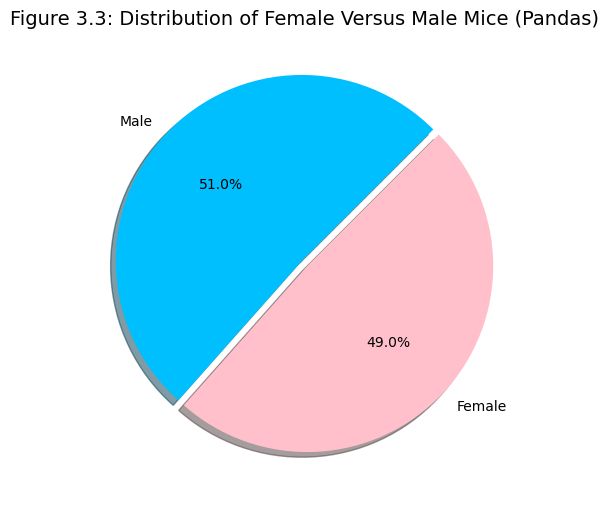

In [28]:
subroutine \
    .DisplayPandasPieChartFromSeries \
        (mouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 3.3: Distribution of Female Versus Male Mice (Pandas)')

### **<span style='color: red;'>Pie Chart With the Matplotlib Method</span>**

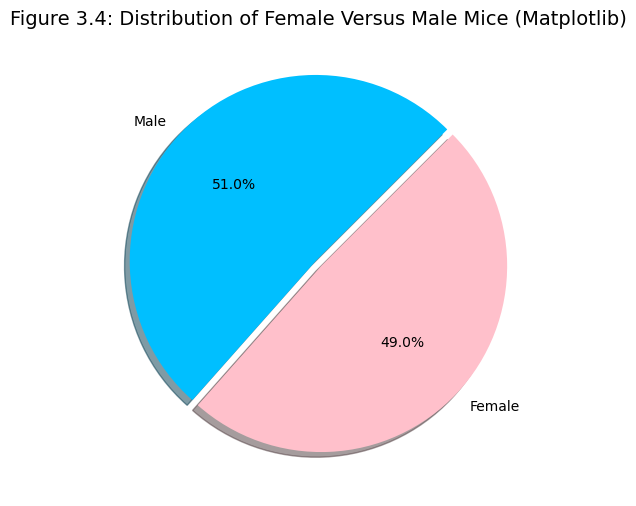

In [29]:
subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (mouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 3.4: Distribution of Female Versus Male Mice (Matplotlib)')

# <br> **Section 4: Quartiles, Outliers, and Box Plots**

### **The Most Promising Drug Treatment Regimens**

In [30]:
# This line of code takes only rows for the four most promising treatment 
# regimens and placebos and assigns the data to a DataFrame.
promisingTreatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Capomulin')|
             (cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Ramicane')|
             (cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Infubinol')|
             (cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Ceftamin')|
             (cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Placebo'), :]

log_function \
    .DebugReturnObjectWriteObject \
        (promisingTreatmentRegimensDataFrame)

### **<span style='color: red;'>The Last (Greatest) Timepoint for Each Mouse</span>**

In [31]:
# This line of code uses groupby to group the rows by the last (greatest) timepoint 
# for each mouse ID, retrieves the maximum timepoint for each mouse, and resets 
# the DataFrame's index.
maximumTimepointPerMouseDataFrame \
    = promisingTreatmentRegimensDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Timepoint'] \
        .max() \
        .reset_index()


log_function \
    .DebugReturnObjectWriteObject \
        (maximumTimepointPerMouseDataFrame)

### **New Merged DataFrame Has the Tumor Volume at the Last Timepoint**

In [32]:
mergedCompleteMedicalStudyDataFrame \
    = pd \
        .merge \
            (maximumTimepointPerMouseDataFrame,
             cleanCompleteMedicalStudyDataFrame, 
             on \
                 = ['Mouse ID',
                    'Timepoint'],
                    how \
                        = 'left')


log_function \
    .DebugReturnObjectWriteObject \
        (mergedCompleteMedicalStudyDataFrame)

In [33]:
# In debug mode, these lines of code check if the mouse IDs in the merged
# complete medical study DataFrame are the same as those in the maximum 
# timepoint per mouse DataFrame.
if log_constant.DEBUG_FLAG == True:
    
    uniqueMouseIDsMergedStudyArray \
        = mergedCompleteMedicalStudyDataFrame \
            ['Mouse ID'] \
            .unique()
    
    uniqueMouseIDsMaximumTimePointArray \
        = maximumTimepointPerMouseDataFrame \
            ['Mouse ID'] \
            .unique()
    
    log_subroutine \
        .PrintAndLogWriteText \
            (str \
                 (np \
                    .array_equal \
                        (uniqueMouseIDsMergedStudyArray, 
                         uniqueMouseIDsMaximumTimePointArray)))

### **<span style='color: red;'>Most Promising Drug Regimen List and Tumor Volume Data List</span>**

In [34]:
mostPromisingDrugRegimenNamesList \
    = promisingTreatmentRegimensDataFrame \
        ['Drug Regimen'] \
         .sort_values \
            (ascending \
                = True) \
         .unique() \
         .tolist()

tumorVolumeSeriesList \
    = []


log_function \
    .DebugReturnObjectWriteObject \
        (mostPromisingDrugRegimenNamesList)

### **Populate Tumor Volume Data List**

In [35]:
# This for loop cycles through the List of drug regimens, extracts the 
# tumor volume for each regimen as a Series, and appends the series to 
# a List.
for regimenName in mostPromisingDrugRegimenNamesList:

    regimenStudyDataFrame \
        = mergedCompleteMedicalStudyDataFrame \
            .loc \
                [(mergedCompleteMedicalStudyDataFrame \
                      ['Drug Regimen']
                  == regimenName), :]

    tumorVolumeSeriesList \
        .append \
            (regimenStudyDataFrame \
                 ['Tumor Volume (mm3)'])


log_function \
    .DebugReturnObjectWriteObject \
        (tumorVolumeSeriesList)

### **<span style='color: red;'>Display Tumor Volume Statistics</span>**

In [36]:
local_subroutine \
    .DisplayTumorVolumeStatistics \
        (mostPromisingDrugRegimenNamesList, 
         tumorVolumeSeriesList)

Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
32.38,40.16,7.78,38.13,20.70,51.83,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
48.72,64.30,15.58,59.85,25.36,87.67,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
54.05,65.53,11.48,60.17,36.83,82.74,1


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
52.94,68.13,15.19,62.03,30.16,90.92,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
31.56,40.66,9.10,36.56,17.91,54.31,0


### **<span style='color: red;'>Display Tumor Volume Statistics Box Plot</span>**

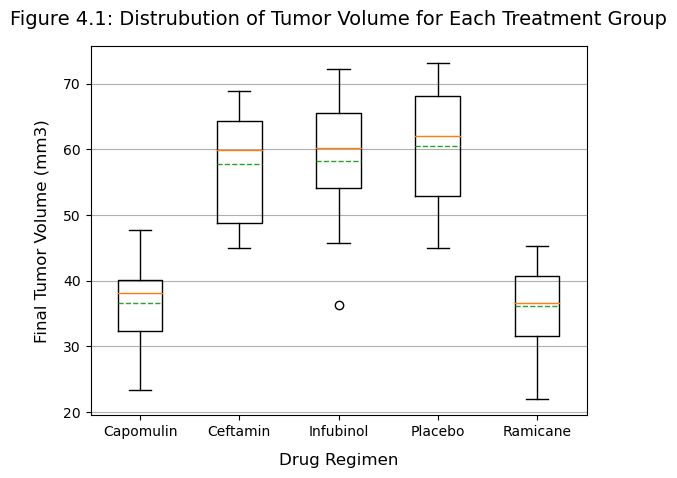

In [37]:
subroutine \
    .DisplayMatplotlibBoxPlotFromSeriesList \
        (tumorVolumeSeriesList,
         mostPromisingDrugRegimenNamesList,
         'Drug Regimen',
         'Final Tumor Volume (mm3)',
         'Figure 4.1: Distrubution of Tumor Volume for Each Treatment Group')

 # <br> **Section 5: Line Plot and Scatter Plot (Capomulin)**

## **Section 5.1: Line Plot**

### **Capomulin Study Data**

In [38]:
# This line of code extracts all rows from the clean medical study DataFrame 
# for the drug regimen, Capomulin.
capomulinStudyDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
            .loc \
                [(cleanCompleteMedicalStudyDataFrame \
                    ['Drug Regimen'] 
                        == 'Capomulin'), :]


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinStudyDataFrame)

### **Random Mouse ID Selection**

In [39]:
randomMouseIDStringVariable \
    = capomulinStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0, 0]


log_function \
    .DebugReturnObjectWriteObject \
        (randomMouseIDStringVariable)

### **Mouse Data Retrieval**

In [40]:
capomulinSingleMouseDataFrame \
    = capomulinStudyDataFrame\
        .loc \
            [(capomulinStudyDataFrame \
                  ['Mouse ID'] 
              == randomMouseIDStringVariable), :]


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinSingleMouseDataFrame)

### **Line Calculations**

In [41]:
capomulinXValuesSeries \
    = capomulinSingleMouseDataFrame \
        ['Timepoint']


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinXValuesSeries)

In [42]:
capomulinYValuesSeries \
    = capomulinSingleMouseDataFrame \
        ['Tumor Volume (mm3)']


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinYValuesSeries)

### **<span style='color: red;'>Display Line Plot</span>**

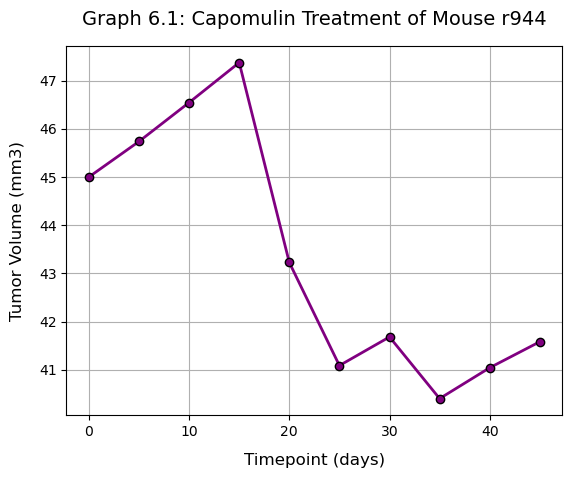

In [43]:
titleStringVariable \
    = f'Graph 6.1: Capomulin Treatment of Mouse {randomMouseIDStringVariable}'

subroutine \
    .DisplayMatplotlibLineChartFromXYSeries \
        (capomulinXValuesSeries,
         capomulinYValuesSeries,
         'purple',
         'solid',
         'Timepoint (days)',
         'Tumor Volume (mm3)',
         titleStringVariable)

## **Section 5.2: Scatter Plot**

### **Mean of Tumor Volumes Per Mouse ID**

In [44]:
capomulinMeanTumorVolumePerMouseSeries \
    = capomulinStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Tumor Volume (mm3)'] \
        .mean()


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinMeanTumorVolumePerMouseSeries)

### **Mean of Weights Per Mouse ID**

In [45]:
capomulinMeanWeightPerMouseSeries \
    = capomulinStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
            .mean()


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinMeanWeightPerMouseSeries)

### **<span style='color: red;'>Display Scatter Plot</span>**

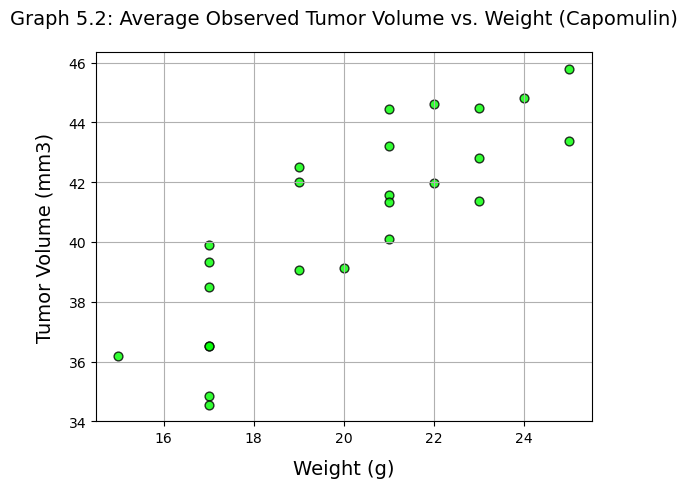

In [46]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (capomulinMeanWeightPerMouseSeries, 
         capomulinMeanTumorVolumePerMouseSeries, 
         'Graph 5.2: Average Observed Tumor Volume vs. Weight (Capomulin)')

 # <br> **Section 6: Correlation and Regression (Capomulin)**

### **Correlation Calculation and Display**

In [47]:
correlationFloatVariable \
    = function \
        .ReturnPearsonCorrelation \
            (capomulinMeanWeightPerMouseSeries, 
             capomulinMeanTumorVolumePerMouseSeries)

log_subroutine \
    .PrintAndLogWriteText \
        ('The correlation between mouse weight and the average tumor volume is ' 
         + '{:1.2f}.'.format(correlationFloatVariable))

The correlation between mouse weight and the average tumor volume is 0.84.


### **<span style='color: red;'>Display Scatter Plot With Regression</span>**

r-value:     0.8419
r-squared:   0.7089


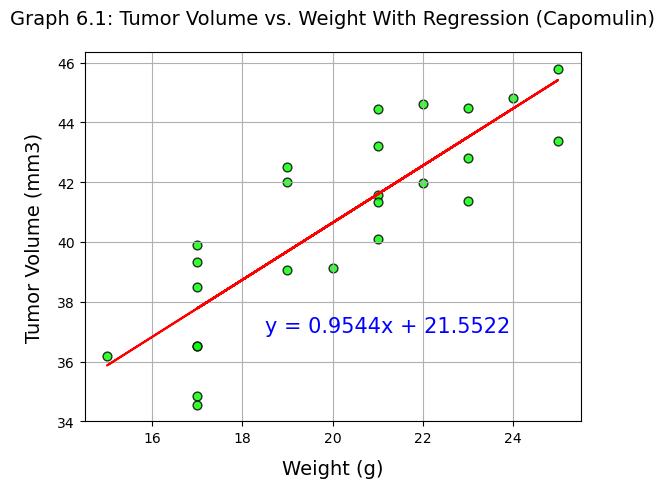

In [48]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (capomulinMeanWeightPerMouseSeries, 
         capomulinMeanTumorVolumePerMouseSeries, 
         'Graph 6.1: Tumor Volume vs. Weight With Regression (Capomulin)',
         1, 18.5, 37)

 # <br> **Section 7: Data Collection Anomalies**

## **Section 7.1: Infubinol Statistical Outlier**

### **Display Infubinol Statistical Outlier**

In [49]:
infubinolOutlierDataFrame \
    = mergedCompleteMedicalStudyDataFrame \
        .loc \
            [(mergedCompleteMedicalStudyDataFrame \
                  ['Drug Regimen'] \
                      == 'Infubinol') \
             & (mergedCompleteMedicalStudyDataFrame \
                    ['Tumor Volume (mm3)'] \
                        < 40.0), :]


log_function \
    .DebugReturnObjectWriteObject \
        (infubinolOutlierDataFrame)

In [50]:
function \
    .ReturnStylerObjectStandardFormat \
        (infubinolOutlierDataFrame, 
         'Table 7.1.1: Infubinol Statistical Outlier')

Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
c326,5,Infubinol,Female,18,25,36.32,0


### **Display Statistical Outlier Mouse Records**

In [51]:
infubinolOutlierMouseDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [cleanCompleteMedicalStudyDataFrame \
                    ['Mouse ID'] \
                        == 'c326', :]


log_function \
    .DebugReturnObjectWriteObject \
        (infubinolOutlierMouseDataFrame)

In [52]:
function \
    .ReturnStylerObjectStandardFormat \
        (infubinolOutlierMouseDataFrame, 
         'Table 7.1.2: Statistical Outlier Mouse Records')

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
c326,Infubinol,Female,18,25,0,45.00,0
c326,Infubinol,Female,18,25,5,36.32,0


## **Section 7.2: Number of Mice vs. Data Point Count**

### **Range of Data Point Count per Mouse**

In [53]:
minimumNumberOfDataPointsPerMouseIntegerVariable \
    = cleanCompleteMedicalStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Drug Regimen'] \
            .count() \
            .min()


log_function \
    .DebugReturnObjectWriteObject \
        (minimumNumberOfDataPointsPerMouseIntegerVariable)

In [54]:
maximumNumberOfDataPointsPerMouseIntegerVariable \
    = cleanCompleteMedicalStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Drug Regimen'] \
            .count() \
            .max()


log_function \
    .DebugReturnObjectWriteObject \
        (maximumNumberOfDataPointsPerMouseIntegerVariable)

### **Display Range of Data Point Count per Mouse**

In [55]:
log_subroutine \
    .PrintAndLogWriteText \
        ('The range of data points per mouse is ' \
         + f'{minimumNumberOfDataPointsPerMouseIntegerVariable}' \
         + f'-{maximumNumberOfDataPointsPerMouseIntegerVariable}.')

The range of data points per mouse is 1-10.


### **Mouse ID by Data Point Count**

In [56]:
dataPointCountByMouseIDSeries \
    = cleanCompleteMedicalStudyDataFrame \
        .groupby \
            ('Mouse ID')\
                ['Drug Regimen'] \
            .count()


log_function \
    .DebugReturnObjectWriteObject \
        (dataPointCountByMouseIDSeries)

In [57]:
frameDictionary \
    = {'Count':
           dataPointCountByMouseIDSeries.tolist(),
       'Mouse ID':
           dataPointCountByMouseIDSeries.index.tolist()}

mouseIDByDataPointCountDataFrame \
    = pd \
        .DataFrame \
            (frameDictionary)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDByDataPointCountDataFrame)

### **Display Mouse ID by Data Point Count**

In [58]:
function \
    .ReturnStylerObjectStandardFormat \
        (mouseIDByDataPointCountDataFrame.head(12), 
         'Table 7.2.1: Mouse ID by Data Point Count')

Count,Mouse ID
10,a203
10,a251
10,a262
10,a275
7,a366
10,a401
10,a411
10,a444
3,a457
10,a492


### **Data Number of Mice vs. Data Point Count**

In [59]:
numberOfMiceVsDataPointCountDataFrame \
    = mouseIDByDataPointCountDataFrame \
        .groupby \
            ('Count') \
                .count()


log_function \
    .DebugReturnObjectWriteObject \
        (numberOfMiceVsDataPointCountDataFrame)

In [60]:
numberOfMiceVsDataPointCountSeries \
    = numberOfMiceVsDataPointCountDataFrame \
        .squeeze()

numberOfMiceVsDataPointCountSeries.name \
    = 'Data Point Count'


log_function \
    .DebugReturnObjectWriteObject \
        (numberOfMiceVsDataPointCountSeries)

### **Display Number of Mice vs. Data Point Count**

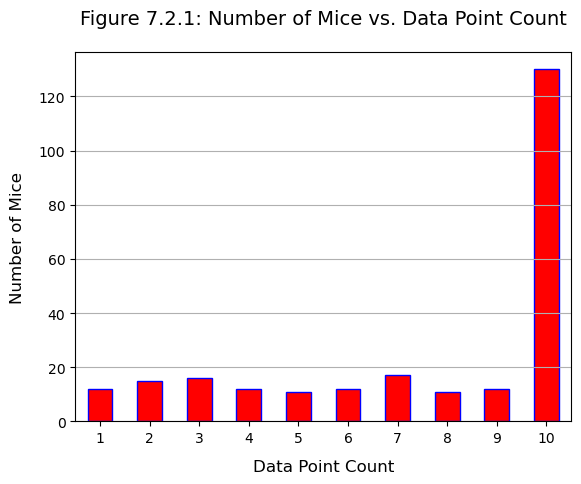

In [61]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (numberOfMiceVsDataPointCountSeries, 
         ['red'],
         'Figure 7.2.1: Number of Mice vs. Data Point Count',
         'Number of Mice',
         axisTickLabelRotationFloatParameter \
            = 0)

## **Section 7.3: Number of Mice Vs. Drug Treatment Regimen**

### **Mouse ID Lists**

In [62]:
mouseIDsOneToThreeList \
    = dataPointCountByMouseIDSeries \
        [(dataPointCountByMouseIDSeries >= 1) & (dataPointCountByMouseIDSeries <= 3)] \
            .index \
        .tolist()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsOneToThreeList)

In [63]:
mouseIDsFourToSixList \
    = dataPointCountByMouseIDSeries \
        [(dataPointCountByMouseIDSeries >= 4) & (dataPointCountByMouseIDSeries <= 6)] \
            .index \
        .tolist()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsFourToSixList)

In [64]:
mouseIDsSevenToNineList \
    = dataPointCountByMouseIDSeries \
        [(dataPointCountByMouseIDSeries >= 7) & (dataPointCountByMouseIDSeries <= 9)] \
            .index \
        .tolist()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsSevenToNineList)

In [65]:
mouseIDsTenList \
    = dataPointCountByMouseIDSeries \
        [dataPointCountByMouseIDSeries == 10] \
            .index \
        .tolist()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsTenList)

### **Medical Study Information Based on Data Point Count**

In [66]:
mouseIDsOneToThreeCompleteMedicalStudyDataFrame \
    = function \
        .ReturnDataFrameRowsWithValue \
            (cleanCompleteMedicalStudyDataFrame, 
             'Mouse ID', 
             mouseIDsOneToThreeList)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsOneToThreeCompleteMedicalStudyDataFrame)

In [67]:
mouseIDsFourToSixCompleteMedicalStudyDataFrame \
    = function \
        .ReturnDataFrameRowsWithValue \
            (cleanCompleteMedicalStudyDataFrame, 
             'Mouse ID', 
             mouseIDsFourToSixList)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsFourToSixCompleteMedicalStudyDataFrame)

In [68]:
mouseIDsSevenToNineCompleteMedicalStudyDataFrame \
    = function \
        .ReturnDataFrameRowsWithValue \
            (cleanCompleteMedicalStudyDataFrame, 
             'Mouse ID', 
             mouseIDsSevenToNineList)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsSevenToNineCompleteMedicalStudyDataFrame)

In [69]:
mouseIDsTenCompleteMedicalStudyDataFrame \
    = function \
        .ReturnDataFrameRowsWithValue \
            (cleanCompleteMedicalStudyDataFrame, 
             'Mouse ID', 
             mouseIDsTenList)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsTenCompleteMedicalStudyDataFrame)

### **Mouse ID/Drug Regimen Information**

In [70]:
mouseIdDrugRegimenOneToThreeDataFrame \
    = mouseIDsOneToThreeCompleteMedicalStudyDataFrame \
        .groupby \
            (['Mouse ID',
              'Drug Regimen']) \
                .size() \
        .reset_index()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIdDrugRegimenOneToThreeDataFrame)

In [71]:
mouseIdDrugRegimenFourToSixDataFrame \
    = mouseIDsFourToSixCompleteMedicalStudyDataFrame \
        .groupby \
            (['Mouse ID',
              'Drug Regimen']) \
                .size() \
        .reset_index()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIdDrugRegimenFourToSixDataFrame)

In [72]:
mouseIdDrugRegimenSevenToNineDataFrame \
    = mouseIDsSevenToNineCompleteMedicalStudyDataFrame \
        .groupby \
            (['Mouse ID',
              'Drug Regimen']) \
                .size() \
        .reset_index()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIdDrugRegimenSevenToNineDataFrame)

In [73]:
mouseIdDrugRegimenTenDataFrame \
    = mouseIDsTenCompleteMedicalStudyDataFrame \
        .groupby \
            (['Mouse ID',
              'Drug Regimen']) \
                .size() \
        .reset_index()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIdDrugRegimenTenDataFrame)

### **Number of Mice Vs. Drug Treatment Regimen**

In [74]:
miceOneToThreeVsRegimenSeries \
    = mouseIdDrugRegimenOneToThreeDataFrame \
        .groupby \
            ('Drug Regimen') \
                ['Mouse ID'] \
        .count()

miceOneToThreeVsRegimenSeries \
    .name \
        = '1-3 Data Points'


log_function \
    .DebugReturnObjectWriteObject \
        (miceOneToThreeVsRegimenSeries)

In [75]:
miceFourToSixVsRegimenSeries \
    = mouseIdDrugRegimenFourToSixDataFrame \
        .groupby \
            ('Drug Regimen') \
                ['Mouse ID'] \
        .count()

miceFourToSixVsRegimenSeries \
    .name \
        = '4-6 Data Points'


log_function \
    .DebugReturnObjectWriteObject \
        (miceFourToSixVsRegimenSeries)

In [76]:
miceSevenToNineVsRegimenSeries \
    = mouseIdDrugRegimenSevenToNineDataFrame \
        .groupby \
            ('Drug Regimen') \
                ['Mouse ID'] \
        .count()

miceSevenToNineVsRegimenSeries \
    .name \
        = '7-9 Data Points'


log_function \
    .DebugReturnObjectWriteObject \
        (miceSevenToNineVsRegimenSeries)

In [77]:
miceTenVsRegimenSeries \
    = mouseIdDrugRegimenTenDataFrame \
        .groupby \
            ('Drug Regimen') \
                ['Mouse ID'] \
        .count()

miceTenVsRegimenSeries \
    .name \
        = '10 Data Points'


log_function \
    .DebugReturnObjectWriteObject \
        (miceTenVsRegimenSeries)

### **Number of Mice Vs. Drug Treatment Regimen**

In [78]:
mouseCountVsDrugRegimenDataFrame \
    = pd \
        .concat \
            ([miceTenVsRegimenSeries, 
              miceSevenToNineVsRegimenSeries,
              miceFourToSixVsRegimenSeries,
              miceOneToThreeVsRegimenSeries], 
             axis = 1)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseCountVsDrugRegimenDataFrame)

### **Display Number of Mice Vs. Drug Treatment Regimen**

In [79]:
function \
    .ReturnStylerObjectStandardFormat \
        (mouseCountVsDrugRegimenDataFrame,
         'Table 7.3.1: Number of Mice Vs. Drug Treatment Regimen',
         0, False)

,10 Data Points,7-9 Data Points,4-6 Data Points,1-3 Data Points
Drug Regimen,,,,
Capomulin,21,1,2,1
Ceftamin,13,3,3,6
Infubinol,9,8,4,4
Ketapril,11,7,1,6
Naftisol,13,2,6,4
Placebo,11,4,5,5
Propriva,7,5,3,9
Ramicane,20,3,1,1
Stelasyn,11,6,4,3


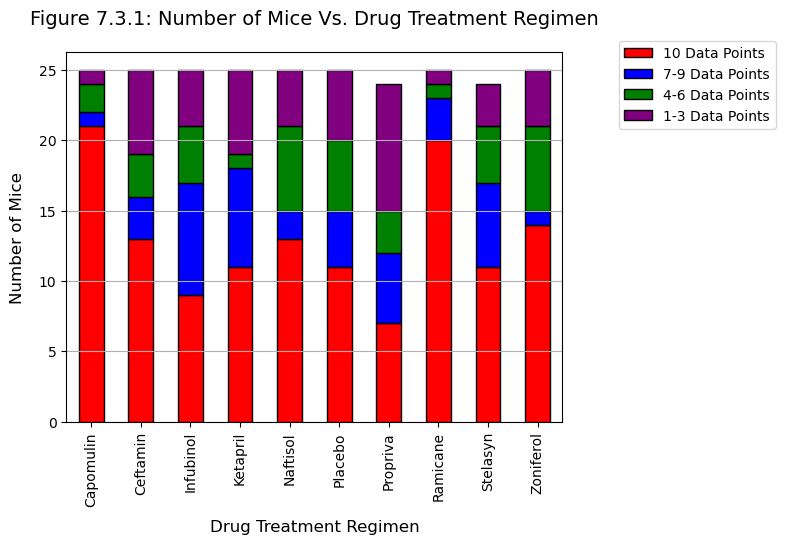

In [80]:
subroutine \
    .DisplayStackedBarChartFromDataFrame \
        (mouseCountVsDrugRegimenDataFrame,
         'Figure 7.3.1: Number of Mice Vs. Drug Treatment Regimen',
         'Drug Treatment Regimen',
         'Number of Mice')

In [81]:
#log_subroutine \
#    .EndProgramExecution()